In [12]:
#Top 1000 Most Played Spotify Songs of All Time

In [13]:
# 1 Importando de pacotes

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# 2 Carregando Dados

In [16]:
# Carregando o dataset
df = pd.read_csv(r'C:\Users\Machoski\Desktop\AC03\spotify_top_1000_tracks.csv')

df.head(10)

,track_name,artist,album,release_date,popularity,spotify_url,id,duration_min
0,All The Stars (with SZA),Kendrick Lamar,Black Panther The Album Music From And Inspire...,2018-02-09,95,https://open.spotify.com/track/3GCdLUSnKSMJhs4...,3GCdLUSnKSMJhs4Tj6CV3s,3.869767
1,Starboy,The Weeknd,Starboy,2016-11-25,90,https://open.spotify.com/track/7MXVkk9YMctZqd1...,7MXVkk9YMctZqd1Srtv4MB,3.840883
2,Señorita,Shawn Mendes,Señorita,2019-06-21,80,https://open.spotify.com/track/0TK2YIli7K1leLo...,0TK2YIli7K1leLovkQiNik,3.182667
3,Heat Waves,Glass Animals,Dreamland,2020-08-07,87,https://open.spotify.com/track/3USxtqRwSYz57Ew...,3USxtqRwSYz57Ewm6wWRMp,3.980083
4,Let Me Love You,DJ Snake,Encore,2016-08-05,87,https://open.spotify.com/track/0lYBSQXN6rCTvUZ...,0lYBSQXN6rCTvUZvg9S0lU,3.432433
5,La La La,Naughty Boy,La La La,2013-01-01,77,https://open.spotify.com/track/52gvlDnre9craz9...,52gvlDnre9craz9dKGObp8,3.679650
6,Apocalypse,Cigarettes After Sex,Cigarettes After Sex,2017-06-09,73,https://open.spotify.com/track/0yc6Gst2xkRu0eM...,0yc6Gst2xkRu0eMLeRMGCX,4.843600
7,Good For You,Selena Gomez,Revival (Deluxe),2015-10-09,80,https://open.spotify.com/track/5xdVqHtFS0eLuNp...,5xdVqHtFS0eLuNp4Z8Wbpa,3.688000
8,Baby,Justin Bieber,My World 2.0,2010-01-01,84,https://open.spotify.com/track/6epn3r7S14KUqlR...,6epn3r7S14KUqlReYr77hA,3.570667
9,There's Nothing Holdin' Me Back,Shawn Mendes,Illuminate (Deluxe),2017-04-20,88,https://open.spotify.com/track/7JJmb5XwzOO8jgp...,7JJmb5XwzOO8jgpou264Ml,3.324000


In [17]:
# 3 Inspeção Inicial dos Dados

In [18]:
# Visualizar as primeiras linhas
print(df.head())

# Verificar informações gerais sobre o DataFrame
print(df.info())

# Verificar estatísticas descritivas
print(df.describe())

                 track_name          artist  \
0  All The Stars (with SZA)  Kendrick Lamar   
1                   Starboy      The Weeknd   
2                  Señorita    Shawn Mendes   
3                Heat Waves   Glass Animals   
4           Let Me Love You        DJ Snake   

                                               album release_date  popularity  \
0  Black Panther The Album Music From And Inspire...   2018-02-09          95   
1                                            Starboy   2016-11-25          90   
2                                           Señorita   2019-06-21          80   
3                                          Dreamland   2020-08-07          87   
4                                             Encore   2016-08-05          87   

                                         spotify_url                      id  \
0  https://open.spotify.com/track/3GCdLUSnKSMJhs4...  3GCdLUSnKSMJhs4Tj6CV3s   
1  https://open.spotify.com/track/7MXVkk9YMctZqd1...  7MXVkk9YMctZqd1S

In [19]:
# 4. Limpeza e Tratamento de Dados

In [22]:
# Converter release_date para datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
print("\nValores nulos após conversão de datas:", df['release_date'].isnull().sum())


Valores nulos após conversão de datas: 23


In [23]:
# 5. Visualização de Outliers

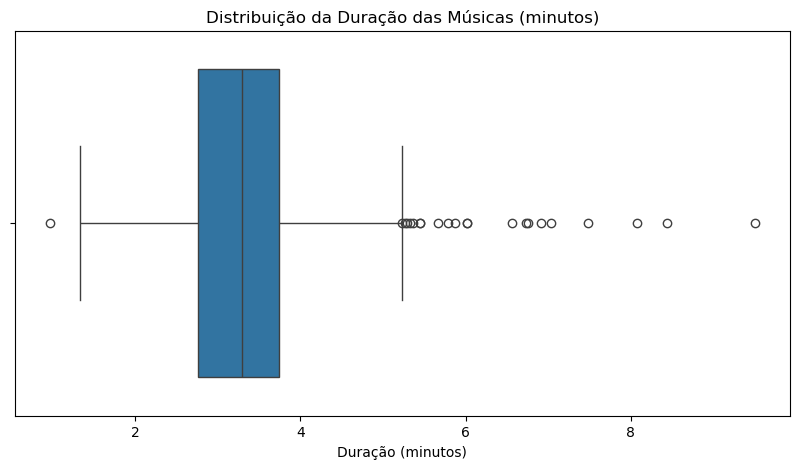

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['duration_min'])
plt.title("Distribuição da Duração das Músicas (minutos)")
plt.xlabel("Duração (minutos)")
plt.show()

In [27]:
# 6. Detecção e Remoção de Outliers com IQR
# Cálculo do IQR
q1 = df['duration_min'].quantile(0.25)
q3 = df['duration_min'].quantile(0.75)
iqr = q3 - q1

# Definindo limites inferior e superior
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [28]:
# Remoção dos outliers
df = df[(df['duration_min'] >= lower_bound) & (df['duration_min'] <= upper_bound)]

print(f"\nDataset após remoção de outliers: {df.shape[0]} registros restantes")


Dataset após remoção de outliers: 978 registros restantes


In [29]:
# Gráfico Duração x Popularidade

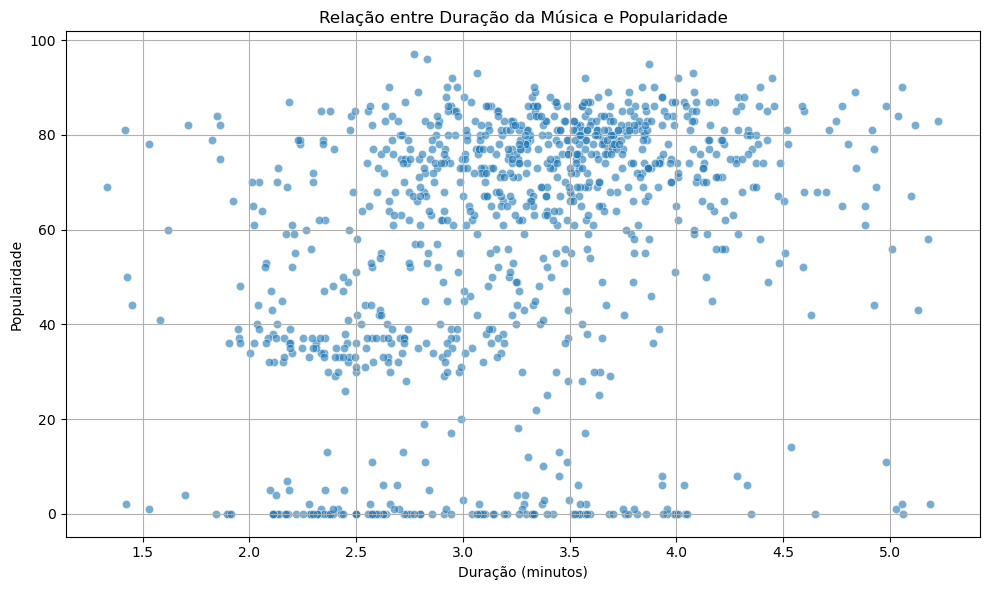

In [30]:
# Definir o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar o gráfico de dispersão
sns.scatterplot(data=df, x='duration_min', y='popularity', alpha=0.6)

# Adicionar título e rótulos
plt.title("Relação entre Duração da Música e Popularidade")
plt.xlabel("Duração (minutos)")
plt.ylabel("Popularidade")

# Ativar a grade para melhor leitura
plt.grid(True)

# Ajustar o layout para não cortar textos
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [31]:
# Top 10 Artistas com Mais Faixas no Top 1000

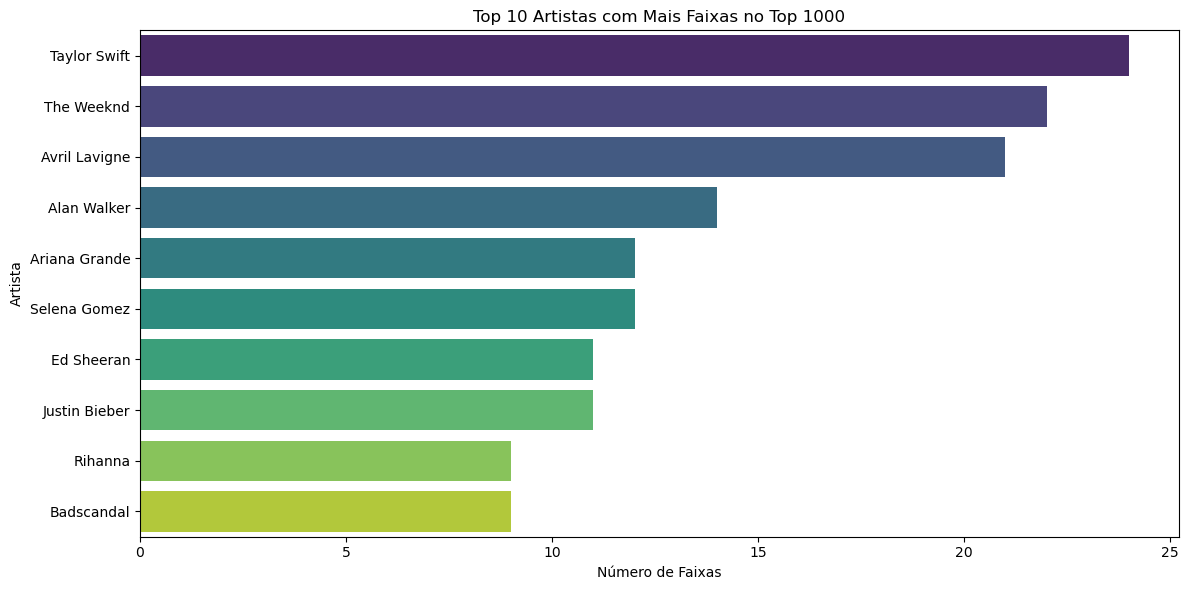

In [34]:
# Contar quantas faixas cada artista possui no dataset
top_artists = df['artist'].value_counts().head(10).reset_index()
top_artists.columns = ['artist', 'track_count']

# Gráfico de barras horizontais sem FutureWarning
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_artists,
    x='track_count',
    y='artist',
    hue='artist',      # Reforça o uso de palette corretamente
    dodge=False,       # Não separa barras lado a lado
    palette='viridis',
    legend=False       # Remove legenda (redundante nesse caso)
)

plt.title("Top 10 Artistas com Mais Faixas no Top 1000")
plt.xlabel("Número de Faixas")
plt.ylabel("Artista")
plt.tight_layout()
plt.show()

In [35]:
#